# Lab13

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from boruta import BorutaPy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Dataset 1:
- Generate X1, X2, . . . , Xp ∼ N(0, 1).
- Denote by χ2k(0.5) median of chi squared distribution with k degrees of freedom.
- Set Y = 1 if Pkj=1 X2j > χ2k(0.5) and Y = 0 otherwise.
- Generate training data of size n.


In [2]:
def generate_database1(n, p, k, random_state=None): 
    if random_state is not None:
        np.random.seed(random_state)
    X = np.random.standard_normal(size=(n, p))
    chi_squared = chi2.ppf(0.5, df=k)
    X_k_sum = np.sum(X[:, :k]**2, axis=1)
    y = X_k_sum > chi_squared
    y = y.astype(int)
    X = pd.DataFrame(X)
    X.columns = [f"X_{i}" for i in range(1, p+1)]
    return X, y


### Dataset 2:
- Generate X1, X2, . . . , Xp ∼ N(0, 1).
- Set Y = 1 if Pkj=1 |Xj | > k and Y = 0 otherwise.
-  Generate training data of size n.

In [3]:
def generate_database2(n, p, k, random_state=None): 
    
    if random_state is not None:
        np.random.seed(random_state)
    X = np.random.standard_normal(size=(n, p))
    X_k_abs_sum = np.sum(np.abs(X[:, :k]), axis=1)
    y = (X_k_abs_sum > k).astype(int)
    X = pd.DataFrame(X)
    X.columns = [f"X_{i}" for i in range(1, p+1)]
    return X, y

## Feature selection

In [4]:
def evaluate_feature_selection(X, y, calculate_boruta=True, random_state=42):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

    model = RandomForestClassifier(100, random_state=random_state)
    model = model.fit(X, y)
    
    #mean decrease in impurity 
    mdi_importances = model.feature_importances_

    # permutatino-based method
    perm_importances = permutation_importance(model, X, y, random_state=random_state)
    perm_importances_mean = perm_importances.importances_mean

    if calculate_boruta: 
        # boruta
        boruta_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
        boruta_py = BorutaPy(estimator=boruta_estimator, random_state=random_state)
        boruta_py.fit(X, y)
        boruta_important_features = boruta_py
    else:
        boruta_important_features = None

    return mdi_importances, perm_importances_mean, boruta_important_features

def significance(mdi_importances, perm_importances, boruta_important_features, X_columns, k):
    importance_df = pd.DataFrame({
        'Feature': X_columns,
        'MDI': mdi_importances,
        'Permutation': perm_importances,
        'Boruta Selected': boruta_important_features.support_
    })

    importance_df['MDI Rank'] = importance_df['MDI'].rank(ascending=False)
    importance_df['Permutation Rank'] = importance_df['Permutation'].rank(ascending=False)
    importance_df = importance_df[:k]
    importance_df['MDI right significant'] = importance_df['MDI Rank'] <= 10
    importance_df['Permutation right significant'] = importance_df['Permutation Rank'] <= 10

    return importance_df

## A, B

In [20]:
n = 500
p = 50
k = 10
X1, y1 = generate_database1(n, p, k, 42)
mdi_importances1, perm_importances1, boruta_important_features1 = evaluate_feature_selection(X1, y1)
X2, y2 = generate_database1(n, p, k, 42)
mdi_importances2, perm_importances2, boruta_important_features2 = evaluate_feature_selection(X2, y2)

In [21]:
significance(mdi_importances1, perm_importances1, boruta_important_features1, X1.columns, k)

,Feature,MDI,Permutation,Boruta Selected,MDI Rank,Permutation Rank,MDI right significant,Permutation right significant
0,X_1,0.044647,0.0020,True,5.0,3.5,True,True
1,X_2,0.026889,0.0000,True,10.0,29.5,True,False
2,X_3,0.032534,0.0020,True,9.0,3.5,True,True
3,X_4,0.035219,0.0016,True,8.0,6.0,True,True
4,X_5,0.053595,0.0016,True,2.0,6.0,True,True
5,X_6,0.047513,0.0000,True,3.0,29.5,True,False
6,X_7,0.044073,0.0016,True,6.0,6.0,True,True
7,X_8,0.057959,0.0244,True,1.0,1.0,True,True
8,X_9,0.045992,0.0076,True,4.0,2.0,True,True
9,X_10,0.043813,0.0004,True,7.0,8.0,True,True


In [22]:
significance(mdi_importances2, perm_importances2, boruta_important_features2, X2.columns, k)

,Feature,MDI,Permutation,Boruta Selected,MDI Rank,Permutation Rank,MDI right significant,Permutation right significant
0,X_1,0.044647,0.0020,True,5.0,3.5,True,True
1,X_2,0.026889,0.0000,True,10.0,29.5,True,False
2,X_3,0.032534,0.0020,True,9.0,3.5,True,True
3,X_4,0.035219,0.0016,True,8.0,6.0,True,True
4,X_5,0.053595,0.0016,True,2.0,6.0,True,True
5,X_6,0.047513,0.0000,True,3.0,29.5,True,False
6,X_7,0.044073,0.0016,True,6.0,6.0,True,True
7,X_8,0.057959,0.0244,True,1.0,1.0,True,True
8,X_9,0.045992,0.0076,True,4.0,2.0,True,True
9,X_10,0.043813,0.0004,True,7.0,8.0,True,True


In [23]:
n = 100
p = 10
k = 4
L = 5
X1, y1 = generate_database1(n, p, k, 42)
mdi_importances1, perm_importances1, boruta_important_features1 = evaluate_feature_selection(X1, y1)
X2, y2 = generate_database1(n, p, k, 42)
mdi_importances2, perm_importances2, boruta_important_features2 = evaluate_feature_selection(X2, y2)

In [24]:
significance(mdi_importances1, perm_importances1, boruta_important_features1, X1.columns, k)

,Feature,MDI,Permutation,Boruta Selected,MDI Rank,Permutation Rank,MDI right significant,Permutation right significant
0,X_1,0.158822,0.068,True,2.0,2.0,True,True
1,X_2,0.151756,0.062,True,3.0,3.0,True,True
2,X_3,0.165897,0.118,True,1.0,1.0,True,True
3,X_4,0.147079,0.056,True,4.0,4.0,True,True


In [25]:
significance(mdi_importances2, perm_importances2, boruta_important_features2, X2.columns, k)

,Feature,MDI,Permutation,Boruta Selected,MDI Rank,Permutation Rank,MDI right significant,Permutation right significant
0,X_1,0.158822,0.068,True,2.0,2.0,True,True
1,X_2,0.151756,0.062,True,3.0,3.0,True,True
2,X_3,0.165897,0.118,True,1.0,1.0,True,True
3,X_4,0.147079,0.056,True,4.0,4.0,True,True


## C

In [ ]:
n = 500
p = 50
k = 10
L = 10

results = []
for l in range(L): 
    X1, y1 = generate_database1(n, p, k)
    mdi_importances1, perm_importances1, boruta_important_features1 = evaluate_feature_selection(X1, y1, k)
    importance_df = significance(mdi_importances1, perm_importances1, boruta_important_features1, X1.columns, k=k)
    good_mdi = np.sum(importance_df["MDI right significant"])
    good_perm = np.sum(importance_df["Permutation right significant"])
    good_boruta = np.sum(importance_df["Boruta Selected"])
    res = (l, k, good_mdi, good_perm, good_boruta)
    results.append(res)

results_df = pd.DataFrame(results)
results_df.columns = ["l", "k", "good_mdi", "good_perm", "good_boruta"]
results_df["good_mdi_share"] = results_df["good_mdi"] / results_df["k"]
results_df["good_perm_share"] = results_df["good_perm"] / results_df["k"]
results_df["good_boruta_share"] = results_df["good_boruta"] / results_df["k"]
results_df

,l,k,good_mdi,good_perm,good_boruta,good_mdi_share,good_perm_share,good_boruta_share
0,0,10,10,6,10,1.0,0.6,1.0
1,1,10,10,6,9,1.0,0.6,0.9
2,2,10,10,8,10,1.0,0.8,1.0
3,3,10,10,6,10,1.0,0.6,1.0
4,4,10,10,7,10,1.0,0.7,1.0
5,5,10,10,5,10,1.0,0.5,1.0
6,6,10,10,6,10,1.0,0.6,1.0
7,7,10,10,6,10,1.0,0.6,1.0
8,8,10,10,7,10,1.0,0.7,1.0
9,9,10,10,9,10,1.0,0.9,1.0


In [16]:
print("MDI total good selection: ", np.sum(results_df["good_mdi"])/np.sum(results_df["k"]))
print("Permutation total good selection: ", np.sum(results_df["good_perm"])/np.sum(results_df["k"]))
print("Boruta total good selection: ", np.sum(results_df["good_boruta"])/np.sum(results_df["k"]))


MDI total good selection:  1.0
Permutation total good selection:  0.66
Boruta total good selection:  0.99


In [17]:
print("MDI all relevant selection: ", np.sum(results_df["good_mdi"]==k)/len(results_df["k"]))
print("Permutation all relevant selection: ", np.sum(results_df["good_perm"]==k)/len(results_df["k"]))
print("Boruta all relevant selection: ", np.sum(results_df["good_boruta"]==k)/len(results_df["k"]))

MDI all relevant selection:  1.0
Permutation all relevant selection:  0.0
Boruta all relevant selection:  0.9


## D

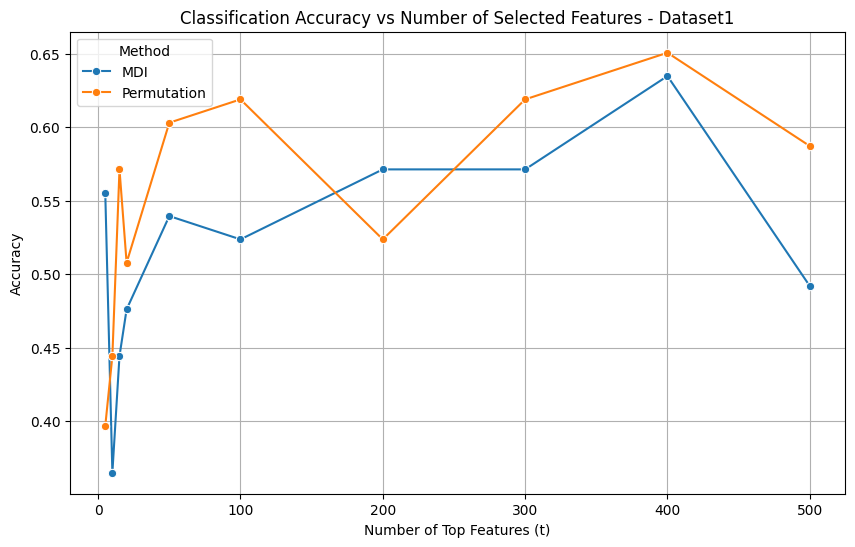

,t,Method,Accuracy,Sel Feature
0,5,MDI,0.555556,"[422, 2, 307, 232, 96]"
1,5,Permutation,0.396825,"[499, 170, 157, 158, 159]"
2,10,MDI,0.365079,"[422, 2, 307, 232, 96, 36, 294, 489, 270, 0]"
3,10,Permutation,0.444444,"[499, 170, 157, 158, 159, 160, 161, 162, 163, ..."
4,15,MDI,0.444444,"[422, 2, 307, 232, 96, 36, 294, 489, 270, 0, 3..."
5,15,Permutation,0.571429,"[499, 170, 157, 158, 159, 160, 161, 162, 163, ..."
6,20,MDI,0.476190,"[422, 2, 307, 232, 96, 36, 294, 489, 270, 0, 3..."
7,20,Permutation,0.507937,"[499, 170, 157, 158, 159, 160, 161, 162, 163, ..."
8,50,MDI,0.539683,"[422, 2, 307, 232, 96, 36, 294, 489, 270, 0, 3..."
9,50,Permutation,0.603175,"[499, 170, 157, 158, 159, 160, 161, 162, 163, ..."


In [18]:
n = 250
p = 500
k = 20

X1, y1 = generate_database1(n, p, k)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=42, train_size=0.75)
t_list = [5, 10, 15, 20, 50, 100, 200, 300, 400, 500]
mdi_importances1, perm_importances1, _ = evaluate_feature_selection(X_train, y_train, calculate_boruta=False)

mdi_selected_features = np.argsort(mdi_importances1)[::-1]
perm_selected_features = np.argsort(perm_importances1)[::-1]

selected_features = {"MDI": mdi_selected_features, 
                     "Permutation": perm_selected_features}

results = []
for t in t_list: 
    for sel_feat_name, sel_feat in selected_features.items():
        X = X_train.iloc[:, sel_feat[:t]]
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X, y_train)
        y_pred = model.predict(X_test.iloc[:, sel_feat[:t]])
        acc = accuracy_score(y_pred, y_test)
        res = (t, sel_feat_name, acc, sel_feat[:t])
        results.append(res)
    
res_df = pd.DataFrame(results)
res_df.columns = ["t", "Method", "Accuracy", "Sel Feature"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=res_df, x="t", y="Accuracy", hue="Method", marker="o")
plt.title("Classification Accuracy vs Number of Selected Features - Dataset1")
plt.xlabel("Number of Top Features (t)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
res_df

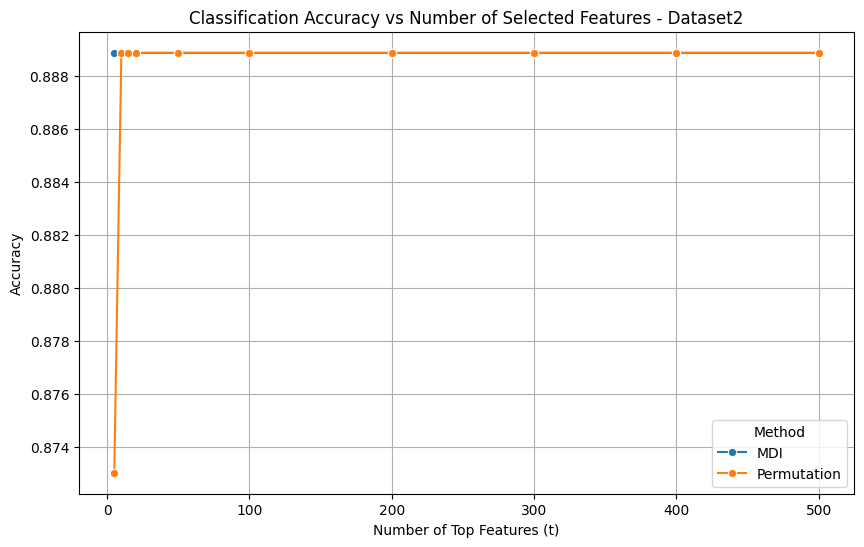

,t,Method,Accuracy,Sel Feature
0,5,MDI,0.888889,"[230, 30, 13, 272, 239]"
1,5,Permutation,0.873016,"[499, 170, 157, 158, 159]"
2,10,MDI,0.888889,"[230, 30, 13, 272, 239, 243, 441, 253, 330, 233]"
3,10,Permutation,0.888889,"[499, 170, 157, 158, 159, 160, 161, 162, 163, ..."
4,15,MDI,0.888889,"[230, 30, 13, 272, 239, 243, 441, 253, 330, 23..."
5,15,Permutation,0.888889,"[499, 170, 157, 158, 159, 160, 161, 162, 163, ..."
6,20,MDI,0.888889,"[230, 30, 13, 272, 239, 243, 441, 253, 330, 23..."
7,20,Permutation,0.888889,"[499, 170, 157, 158, 159, 160, 161, 162, 163, ..."
8,50,MDI,0.888889,"[230, 30, 13, 272, 239, 243, 441, 253, 330, 23..."
9,50,Permutation,0.888889,"[499, 170, 157, 158, 159, 160, 161, 162, 163, ..."


In [5]:
n = 250
p = 500
k = 20

X2, y2 = generate_database2(n, p, k)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=42, train_size=0.75)
t_list = [5, 10, 15, 20, 50, 100, 200, 300, 400, 500]
mdi_importances1, perm_importances1, _ = evaluate_feature_selection(X_train, y_train, calculate_boruta=False)

mdi_selected_features = np.argsort(mdi_importances1)[::-1]
perm_selected_features = np.argsort(perm_importances1)[::-1]

selected_features = {"MDI": mdi_selected_features, 
                     "Permutation": perm_selected_features}

results = []
for t in t_list: 
    for sel_feat_name, sel_feat in selected_features.items():
        X = X_train.iloc[:, sel_feat[:t]]
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X, y_train)
        y_pred = model.predict(X_test.iloc[:, sel_feat[:t]])
        acc = accuracy_score(y_pred, y_test)
        res = (t, sel_feat_name, acc, sel_feat[:t])
        results.append(res)
    
res_df = pd.DataFrame(results)
res_df.columns = ["t", "Method", "Accuracy", "Sel Feature"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=res_df, x="t", y="Accuracy", hue="Method", marker="o")
plt.title("Classification Accuracy vs Number of Selected Features - Dataset2")
plt.xlabel("Number of Top Features (t)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
res_df